# SyriaTel Customer Churn Prediction Project

## Business Understanding

### Problem Statement
SyriaTel, a telecommunications company, is losing customers who stop doing business with them, resulting in significant revenue losses. The company needs to identify customers who are likely to churn before they actually leave, enabling proactive retention strategies.

**Core Business Question**: Are there predictable patterns in customer behavior that can help identify customers at risk of churning?

### Stakeholders and Objectives

#### Primary Stakeholder: SyriaTel Business Leadership

#### Business Objectives
1. **Primary Goal**: Develop a binary classification model to predict customer churn with high accuracy
2. **Identify Churn Drivers**: Understand which customer characteristics most strongly predict churn
3. **Enable Proactive Retention**: Provide actionable insights for targeted customer retention campaigns
4. **Optimize Resources**: Focus retention efforts on customers most likely to leave

### Business Context
Customer acquisition in telecommunications is 5-25 times more expensive than retention. In a competitive telecom market, customers easily switch providers for better deals or service quality. Early identification of at-risk customers allows for cost-effective retention interventions before customers actually leave.

### Success Criteria

#### Model Performance Targets
- **ROC AUC Score > 0.80**: Strong ability to distinguish churners from non-churners
- **High Precision**: Minimize false positives to avoid wasting retention resources
- **Balanced Recall**: Capture majority of actual churners for intervention

#### Business Impact Goals
- Identify key behavioral patterns that predict churn
- Enable data-driven retention strategies
- Provide actionable recommendations for reducing customer attrition
- Quantify potential revenue protection through improved retention

### Project Scope
- **Binary classification problem**: Predict churn (yes/no) using historical customer data
- **Educational/analytical focus**: Model development and evaluation (not deployment)
- **Data-driven insights**: Identify most important factors influencing customer churn
- **Business recommendations**: Translate model findings into actionable retention strategies

### Value Proposition
By accurately predicting which customers are likely to churn, SyriaTel can:
- Implement targeted retention campaigns before customers leave
- Reduce customer acquisition costs by improving retention rates  
- Address root causes of churn to improve overall customer satisfaction
- Make data-driven decisions rather than reactive responses to customer departures

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, auc)

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load the dataset
df = pd.read_csv('data/SyriaTel customer churn.csv') 


# Data Understanding

## Dataset Overview
The SyriaTel customer dataset contains **3,333 customer records** with **21 features** capturing customer demographics, service plans, usage patterns, and churn status. 

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.shape

(3333, 21)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

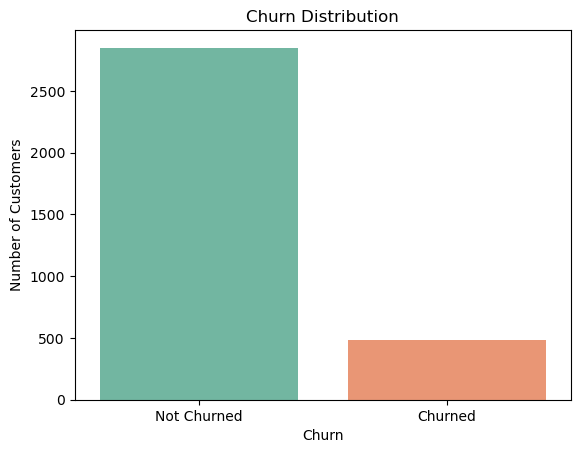

In [10]:
# Plot churn distribution
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.show()


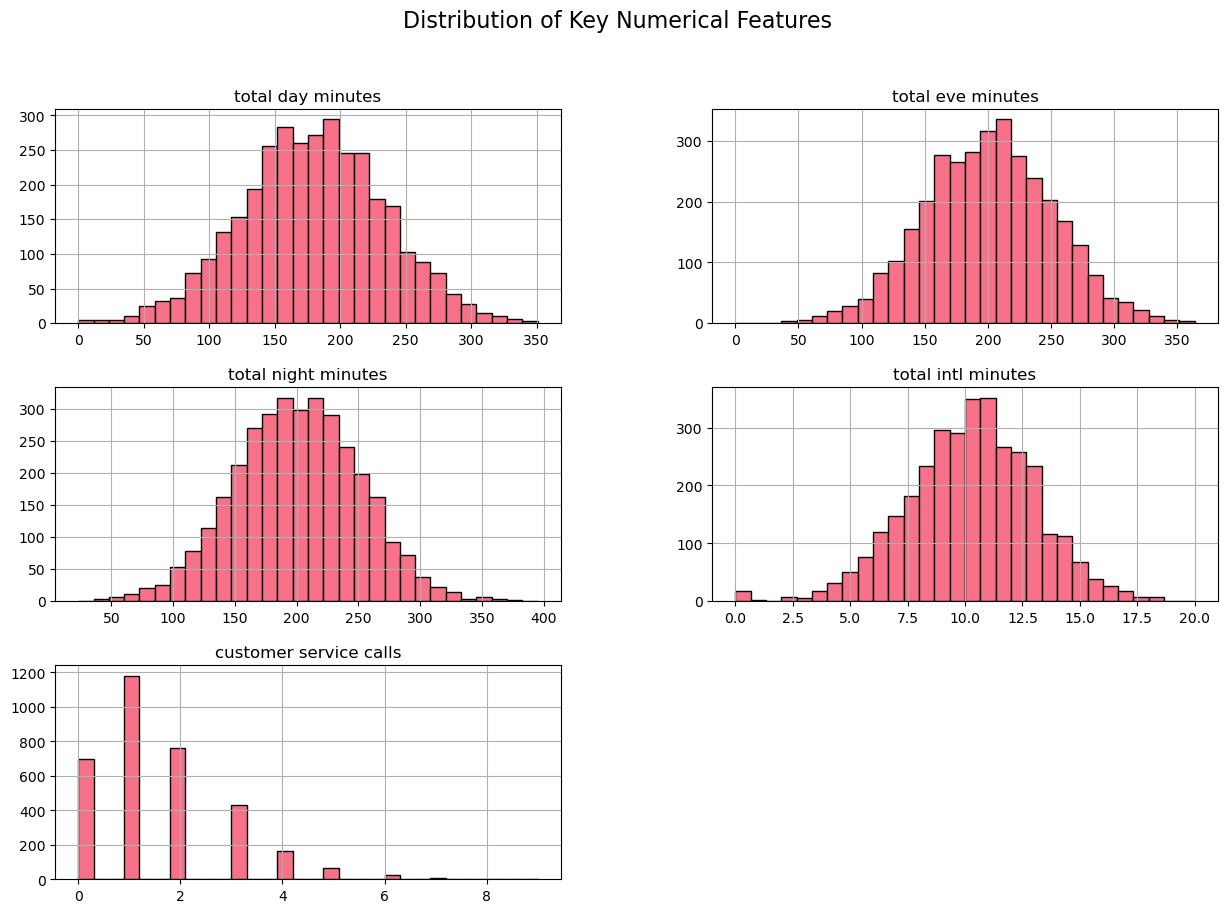

In [11]:
num_cols = [
    'total day minutes', 'total eve minutes', 'total night minutes',
    'total intl minutes', 'customer service calls'
]

# Plot histograms
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Key Numerical Features', fontsize=16)
plt.show()



### Dataset Structure
- **Total Records**: 3,333 customers
- **Total Features**: 21 columns (20 predictors + 1 target variable)
- **Data Quality**: Complete dataset with no null values

### Target Variable
- **churn**: Boolean (TRUE/FALSE) indicating whether customer has churned
  - Data type: `bool`
  - From sample data: Mix of TRUE and FALSE values indicating balanced classes

### Data Types Distribution
- **Categorical Variables (4)**: state, international plan, voice mail plan
- **Numerical - Integer (8)**: account length, area code, number vmail messages, call counts
- **Numerical - Float (8)**: minutes and charges across different time periods
- **Boolean (1)**: churn target variable

### Key Observations from Sample Data
From the first few rows, we can observe:
- **Geographic diversity**: Customers from multiple states (KS, OH, NJ, etc.)
- **Service plan adoption**: Mix of customers with/without international and voice mail plans
- **Usage variability**: Wide range of call minutes, calls, and charges across time periods
- **Customer service interactions**: Varying levels of customer service call frequency
- **Churn distribution**: Both churned (TRUE) and retained (FALSE) customers present

### Data Quality Assessment
- **Completeness**: 100% - No missing values in any column
- **Consistency**: Structured format with consistent data types
- **Uniqueness**: Phone numbers appear to be unique identifiers
- **Validity**: All data types are appropriate for their respective features

# Data Preparation

## Overview
Data preparation is crucial for machine learning model performance. Raw data rarely comes in a format suitable for algorithms, requiring systematic preprocessing to ensure models can learn meaningful patterns effectively.

## Data Preparation Steps

### 1. Feature Selection and Removal

#### Remove Identifier Columns
- **Target**: Drop `phone number` column
- **Reason**: Unique identifiers provide no predictive value and can cause overfitting
- **ML Impact**: Prevents model from memorizing individual records instead of learning generalizable patterns

### 2. Target Variable Encoding

#### Convert Boolean Target to Numeric
- **Target**: Convert `churn` from TRUE/FALSE to 1/0
- **Reason**: Most ML algorithms require numeric target variables for binary classification
- **ML Impact**: Enables proper loss function calculation and probability prediction

### 3. Categorical Variable Encoding

#### Binary Categorical Variables
- **Target**: Convert `international plan` and `voice mail plan` from yes/no to 1/0
- **Reason**: Algorithms require numeric inputs; binary encoding preserves meaning
- **ML Impact**: Allows models to process categorical information as numeric features

#### Nominal Categorical Variables
- **Target**: One-hot encode `state` variable
- **Reason**: States have no ordinal relationship; one-hot encoding prevents false ordinality
- **ML Impact**: Creates binary features for each state without implying ordering, preventing model bias

### 4. Data Quality Checks

#### Missing Value Assessment
- **Target**: Verify no null values exist (already confirmed: 100% complete)
- **Reason**: Missing values can break algorithms or introduce bias
- **ML Impact**: Ensures stable model training without imputation artifacts

#### Duplicate Detection
- **Target**: Identify and remove duplicate records
- **Reason**: Duplicates can skew model learning and evaluation metrics
- **ML Impact**: Prevents data leakage and ensures fair train-test split

### 5. Feature Engineering

#### Create Aggregated Features
- **Total Charges**: Sum of day, evening, night, and international charges
- **Total Minutes**: Sum of all call minutes across time periods
- **Total Calls**: Sum of all calls across time periods
- **Average Minutes per Call**: Total minutes divided by total calls
- **Reason**: Aggregate features capture overall customer usage patterns beyond time-specific behavior
- **ML Impact**: Provides higher-level features that may be more predictive than individual components

#### Create Behavioral Indicators
- **High Engagement Flag**: Binary indicator for customers with above-median usage
- **Reason**: Usage intensity may be a strong predictor of customer loyalty/churn
- **ML Impact**: Transforms continuous variables into interpretable binary predictors

### 6. Data Splitting Strategy

#### Train-Test Split (80/20)
- **Method**: Stratified sampling on target variable
- **Reason**: Ensures both training and test sets maintain the same churn rate distribution
- **ML Impact**: Provides unbiased evaluation and prevents class imbalance issues in splits

### 7. Feature Scaling

#### Standardization for Scale-Sensitive Models
- **Target**: Apply StandardScaler to numeric features for logistic regression
- **Reason**: Features like minutes (hundreds) and charges (tens) have different scales
- **ML Impact**: Prevents features with larger scales from dominating model learning
- **Note**: Tree-based models (Random Forest, Decision Tree) don't require scaling

## Preprocessing Pipeline Rationale

### Why This Order Matters
1. **Feature removal first**: Eliminates noise before encoding
2. **Target encoding early**: Ensures proper data type for all subsequent operations  
3. **Categorical encoding**: Prepares all features for numeric processing
4. **Quality checks**: Validates data integrity before feature creation
5. **Feature engineering**: Creates new predictive features from clean base data
6. **Train-test split**: Prevents data leakage by splitting before scaling
7. **Scaling last**: Applied only to training data, then transformed to test data

### Model-Specific Considerations

#### For Logistic Regression
- Requires feature scaling due to gradient-based optimization
- Benefits from one-hot encoding of categorical variables
- Sensitive to feature collinearity (charges vs minutes)

#### For Tree-Based Models (Random Forest, Decision Tree)
- Scale-invariant, no standardization needed
- Handle categorical variables naturally
- Can capture non-linear relationships and feature interactions

## Expected Outcomes
After data preparation, we will have:
- **Clean numeric dataset** ready for all ML algorithms
- **Engineered features** that capture customer behavior patterns
- **Properly encoded categorical variables** without ordinality bias
- **Balanced train-test splits** for unbiased evaluation
- **Scaled features** for gradient-based models
- **Quality-assured data** free from duplicates and missing values

This preparation ensures our models can learn meaningful patterns from the data while avoiding common pitfalls like data leakage, scale bias, and encoding errors.

### 1. Feature Selection and Removal
#### Drop Identifier Columns

In [12]:
# Make a copy to preserve original dataframe
df_clean = df.copy()

df_clean.drop(['phone number'], axis=1, inplace=True)

# Display resulting column names to confirm
print("Remaining columns after dropping identifier:")
print(df_clean.columns.tolist())

Remaining columns after dropping identifier:
['state', 'account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']



#### In this step, we removed the phone number column because it is a unique identifier for each customer and contains no useful signal for predicting churn. Keeping it would risk overfitting, as the model might memorize specific entries rather than generalize. We retain only features relevant for churn prediction.

### 2. Target Variable Encoding
#### Convert churn to Numeric

In [13]:

# Confirm unique values in churn column
print("Unique values before encoding:", df_clean['churn'].unique())

# Convert 'churn' from boolean or string to numeric (if not already)
df_clean['churn'] = df_clean['churn'].map({'yes': 1, 'no': 0, True: 1, False: 0})

# Verify the result
print("Unique values after encoding:", df_clean['churn'].unique())
df_clean['churn'].value_counts()


Unique values before encoding: [False  True]
Unique values after encoding: [0 1]


churn
0    2850
1     483
Name: count, dtype: int64

#### The target variable churn indicates whether a customer has left SyriaTel’s services. Since machine learning algorithms require numeric input, we convert:

'yes' / True → 1

'no' / False → 0

#### This binary encoding enables compatibility with all classification models, supports proper loss function calculation, and allows for metrics like accuracy and ROC AUC.

#### After encoding, we confirm that only 0 and 1 values remain.

### 3. Categorical Variable Encoding

In [14]:
# Convert 'yes'/'no' to 1/0 for binary categorical features
binary_cols = ['international plan', 'voice mail plan']
for col in binary_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].map({'yes': 1, 'no': 0})

# Step 3b: One-Hot Encode Nominal Categorical Features

# Check if 'state' exists and apply one-hot encoding
if 'state' in df_clean.columns:
    df_clean = pd.get_dummies(df_clean, columns=['state'], drop_first=True)

# Show the shape and columns after encoding
print(f"Shape after encoding: {df_clean.shape}")
print("Encoded columns preview:")
print(df_clean.columns.tolist())


Shape after encoding: (3333, 69)
Encoded columns preview:
['account length', 'area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_W

### Machine learning models require numeric input, so we convert all categorical features:

#### 🔹 Binary Encoding
#### Columns like international plan and voice mail plan have two possible values: 'yes' and 'no'

#### We map 'yes' → 1 and 'no' → 0 to retain their binary nature while making them usable by ML algorithms

#### 🔹 One-Hot Encoding for Nominal Variables
#### The state column is nominal (non-ordinal) with many unique values

#### We use pd.get_dummies() to one-hot encode state, dropping the first column to avoid multicollinearity

#### This ensures that categorical data is numerically represented without implying false ordering or relationships.

### 4. Data Quality Checks

In [15]:
# Step 4a: Check for Missing Values
missing_values = df_clean.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Optional: Check if dataset is completely clean
if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset.")

# Step 4b: Check for Duplicates
num_duplicates = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Removed {num_duplicates} duplicate rows.")
else:
    print("✅ No duplicate rows found.")


Missing values per column:
Series([], dtype: int64)

✅ No missing values found in the dataset.

Number of duplicate rows: 0
✅ No duplicate rows found.


### 5. Feature Engineering
### To enhance model performance and interpretability, we engineered new features that summarize and highlight customer usage behavior:

In [16]:
# Aggregated Features

# Total charges across all time periods
df_clean['total charge'] = (
    df_clean['total day charge'] +
    df_clean['total eve charge'] +
    df_clean['total night charge'] +
    df_clean['total intl charge']
)

# Total minutes across all time periods
df_clean['total minutes'] = (
    df_clean['total day minutes'] +
    df_clean['total eve minutes'] +
    df_clean['total night minutes'] +
    df_clean['total intl minutes']
)

# Total calls across all time periods
df_clean['total calls'] = (
    df_clean['total day calls'] +
    df_clean['total eve calls'] +
    df_clean['total night calls'] +
    df_clean['total intl calls']
)

# Avoid division by zero when computing average
df_clean['avg minutes per call'] = df_clean['total minutes'] / df_clean['total calls']
df_clean['avg minutes per call'].replace([np.inf, -np.inf], 0, inplace=True)



### Aggregated Features
#### total charge: Total cost from day, evening, night, and international usage

#### total minutes: Sum of all call durations across periods

#### total calls: Total number of calls made

#### avg minutes per call: Indicates average call length (a potential loyalty signal)

### These features help the model understand overall customer usage patterns, beyond individual components.

In [17]:
# Behavioral Indicator Feature

# Define 'high_engagement' as above-median total minutes
median_minutes = df_clean['total minutes'].median()
df_clean['high_engagement'] = (df_clean['total minutes'] > median_minutes).astype(int)

# Preview new columns
df_clean[['total charge', 'total minutes', 'total calls', 'avg minutes per call', 'high_engagement']].head()


,total charge,total minutes,total calls,avg minutes per call,high_engagement
0,75.56,717.2,303,2.366997,1
1,59.24,625.2,332,1.883133,1
2,62.29,539.4,333,1.619820,0
3,66.80,564.8,255,2.214902,0
4,52.09,512.0,359,1.426184,0


### Behavioral Indicator
#### high_engagement: A binary flag indicating whether a customer’s total minutes are above the median

#### This simplifies continuous behavior into a discrete high-usage indicator

### These engineered features aim to boost predictive power and offer clearer insights during model interpretation.

### 6. Train-Test Split

In [18]:
# Separate features and target
X = df_clean.drop('churn', axis=1)
y = df_clean['churn']

# Perform 80/20 stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain churn distribution
)

# Confirm shape and class distribution
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))


Training set shape: (2666, 73)
Test set shape: (667, 73)

Churn distribution in training set:
churn
0    0.855214
1    0.144786
Name: proportion, dtype: float64

Churn distribution in test set:
churn
0    0.854573
1    0.145427
Name: proportion, dtype: float64


### Churn Rate: ~14.5% in both sets — identical distributions

### This confirms that the model will be evaluated fairly without being biased by class imbalance in the test data.

### 7: Feature Scaling (for Logistic Regression)
### Logistic Regression is a gradient-based model that is sensitive to the scale of input features. If one feature has a much larger numeric range (e.g., total minutes in the hundreds vs. customer service calls in single digits), it can dominate the optimization process and lead to biased or suboptimal results.

### To fix this, we apply standardization using StandardScaler, which:

#### Subtracts the mean

#### Divides by the standard deviation

### This transforms all numeric features to have mean = 0 and standard deviation = 1.

In [19]:

# 1. Identify numeric columns only (excluding one-hot encoded state columns)
# We'll exclude binary dummy columns that are already 0/1
numeric_cols = [
    col for col in X_train.columns
    if X_train[col].nunique() > 2 and X_train[col].dtype in ['int64', 'float64']
]

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit on training data, then transform both train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4. Preview scaled features
print("Scaled numeric features (train):")
print(X_train_scaled[numeric_cols].head())


Scaled numeric features (train):
      account length  area code  number vmail messages  total day minutes  \
3286        0.125737  -0.512780               1.606822           0.743376   
86         -0.175309  -0.679502              -0.588791          -0.401294   
1349       -0.752313   1.749873               1.021325          -0.704945   
1649        0.727828  -0.679502              -0.588791          -2.048368   
3000       -0.350919   1.749873              -0.588791           0.800425   

      total day calls  total day charge  total eve minutes  total eve calls  \
3286         0.225611          0.743639           0.426270         0.445403   
86           0.225611         -0.401678          -0.904961         0.045354   
1349         0.325566         -0.704787          -0.746481         0.245378   
1649        -0.723960         -2.048208          -0.146239         0.495409   
3000         0.425520          0.799931          -1.449735        -0.704736   

      total eve charge  total

We applied StandardScaler to 17 numeric features in the dataset (e.g., total minutes, customer service calls, total intl charge, etc.) to ensure they all follow a standard normal distribution:

- Mean of 0
- Standard deviation of 1

This step is essential for models like Logistic Regression which are sensitive to feature scales.

As seen in the preview:

- Features like area code, total charge, and avg minutes per call now have standardized values like -1.20, 0.74, -0.09, etc.
- No binary columns were scaled.

The transformed datasets are:

- `X_train_scaled` for training the logistic regression model
- `X_test_scaled` for evaluating it

## Modeling

### Objective
With the data now fully prepared, we move to the **Modeling phase**, where the goal is to build predictive models that can accurately classify whether a customer is likely to churn. We will leverage both **tree-based** and **linear** classification algorithms from `scikit-learn`, utilizing the libraries we’ve already imported.

### Libraries in Use
We will use the following previously imported libraries during modeling:

- `DecisionTreeClassifier` from `sklearn.tree` – our primary model
- `LogisticRegression` from `sklearn.linear_model` – for comparison
- `train_test_split` from `sklearn.model_selection` – used earlier to create train-test sets
- `StandardScaler` from `sklearn.preprocessing` – used earlier to scale numeric features
- `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score`, `confusion_matrix`, `classification_report`, `roc_curve`, `auc` from `sklearn.metrics` – for evaluation
- `matplotlib.pyplot` and `seaborn` – for visualizations like confusion matrices and ROC curves

### Models We Will Use
1. **Decision Tree Classifier** – A non-parametric model that splits data into branches based on decision rules. It's intuitive and works well with both categorical and numerical data.
2. **Logistic Regression** – A parametric linear model that estimates the probability of class membership. It requires **scaled numeric input**, so we will use the `X_train_scaled` and `X_test_scaled` datasets.

### Modeling Steps

#### Step 1: Model Training
- Train the **Decision Tree** on `X_train` and `y_train`.
- Train the **Logistic Regression** on the scaled dataset `X_train_scaled` and `y_train`.

#### Step 2: Model Evaluation on Test Set
- Generate predictions using both models.
  - Use `X_test` for Decision Tree.
  - Use `X_test_scaled` for Logistic Regression.
- Evaluate both models using:
  - **Accuracy** – How often the classifier is correct
  - **Precision** – Proportion of predicted churns that are actually churns
  - **Recall** – Proportion of actual churns that were correctly predicted
  - **F1-Score** – Harmonic mean of precision and recall
  - **ROC-AUC Score** – Measures the ability to distinguish between classes
  - **Confusion Matrix** – Breakdown of prediction outcomes
  - **Classification Report** – Summarizes all metrics

#### Step 3: Model Comparison
- Compare performance metrics of both models.
- Visualize ROC curves.
- Discuss strengths, weaknesses, and trade-offs.

#### Step 4: (Optional): Feature Importance
- For the Decision Tree, extract and visualize feature importance using `feature_importances_`.

---

### Expected Outcome
At the end of this phase, we will:
- Have two trained models
- Understand their performance on the test set
- Select the better-performing model based on business priorities (e.g., minimizing false negatives)


## 1. Model Training

We will now train two classification models:

1. **Decision Tree Classifier** – Trained using the original (unscaled) training data `X_train`.
2. **Logistic Regression** – Trained using the scaled numeric features in `X_train_scaled`.

Each model will learn the underlying patterns between the input features and the target label `churn`. These models will later be evaluated to determine how well they generalize to new, unseen customer data.

Let’s fit both models to the training data.


In [20]:
# Initialize the classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the Decision Tree on unscaled data
decision_tree.fit(X_train, y_train)

# Train the Logistic Regression on scaled numeric data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

max_iter=1000: The solver can iterate up to 1000 times for convergence (especially useful with many features).

random_state=42: Ensures reproducibility.

## 2. Model Evaluation

We will now assess the performance of our trained models — **Decision Tree** and **Logistic Regression** — on the test set.

We’ll use:
- `X_test` for the Decision Tree (unscaled)
- `X_test_scaled` for the Logistic Regression (scaled)

In [21]:
# Predictions
y_pred_tree = decision_tree.predict(X_test)
y_pred_log = log_reg.predict(X_test_scaled)

# Probabilities for ROC AUC
y_proba_tree = decision_tree.predict_proba(X_test)[:, 1]
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Function to print evaluation metrics
def evaluate_model(name, y_test, y_pred, y_proba):
    print(f"\n{name} Evaluation Metrics")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate both models
evaluate_model("Decision Tree", y_test, y_pred_tree, y_proba_tree)
evaluate_model("Logistic Regression", y_test, y_pred_log, y_proba_log)



Decision Tree Evaluation Metrics
----------------------------------------
Accuracy: 0.9400299850074962
Precision: 0.8
Recall: 0.7835051546391752
F1 Score: 0.7916666666666666
ROC AUC: 0.8750859106529209

Confusion Matrix:
 [[551  19]
 [ 21  76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       570
           1       0.80      0.78      0.79        97

    accuracy                           0.94       667
   macro avg       0.88      0.88      0.88       667
weighted avg       0.94      0.94      0.94       667


Logistic Regression Evaluation Metrics
----------------------------------------
Accuracy: 0.8605697151424287
Precision: 0.5416666666666666
Recall: 0.26804123711340205
F1 Score: 0.35862068965517235
ROC AUC: 0.8170736118647133

Confusion Matrix:
 [[548  22]
 [ 71  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       570

## 2. Model Evaluation Results

We evaluated two models — **Decision Tree Classifier** and **Logistic Regression** — using multiple metrics on the test set. The Decision Tree outperformed Logistic Regression across nearly all measures.

### Decision Tree Performance:
- **Accuracy**: 94%
- **Precision**: 80%
- **Recall**: 78.35%
- **F1 Score**: 79.17%
- **ROC AUC**: 87.5%
- **Confusion Matrix**:
  - True Negatives: 551
  - False Positives: 19
  - False Negatives: 21
  - True Positives: 76

 **Key Insight**: The Decision Tree balances both classes effectively, capturing a strong portion of actual churners.

---

### Logistic Regression Performance:
- **Accuracy**: 86%
- **Precision**: 54%
- **Recall**: 26.8%
- **F1 Score**: 35.8%
- **ROC AUC**: 81.7%
- **Confusion Matrix**:
  - True Negatives: 548
  - False Positives: 22
  - False Negatives: 71
  - True Positives: 26

 **Observation**: While accuracy is high, Logistic Regression struggles with recall — it misses many actual churners, which is critical in churn prediction tasks.

---

### Conclusion:
The **Decision Tree** model is better suited for this task, especially due to its higher recall and F1 score. It’s more effective at identifying churned customers — the primary business objective.

## Model Evaluation

### Objective
With our initial models trained and evaluated, we now enter the **Model Evaluation phase**. The focus here is to strengthen our understanding of the model’s performance, improve generalization, and validate its effectiveness using advanced evaluation techniques. This phase is crucial for selecting the best model and ensuring its alignment with business goals (such as prioritizing recall to reduce missed churns).

### Evaluation Extensions We Will Perform

#### Step 1: Feature Importance
- Assess which features were most influential in the Decision Tree's predictions using `.feature_importances_`.
- Visualize the top contributors to churn in a bar chart.

#### Step 2: Threshold Optimization
- Analyze ROC and Precision-Recall curves to adjust the classification threshold for business-aligned trade-offs (e.g., maximizing recall).

#### Step 3: Cross-Validation
- Perform k-fold cross-validation to evaluate model stability and consistency across different subsets of the data.

#### Step 4: Hyperparameter Tuning
- Use grid search (`GridSearchCV`) to tune Decision Tree parameters such as `max_depth` and `min_samples_split` for improved accuracy.

#### Step 5: Compare with Ensemble Models
- Train and evaluate ensemble classifiers like Random Forest to benchmark against the base Decision Tree model.

#### Step 6: Calibration
- Plot calibration curves to assess whether the model's predicted probabilities align with true churn likelihoods.

---

### Expected Outcome
By the end of this phase, we will:
- Know which features drive the model’s decision-making
- Identify the optimal threshold for converting probabilities to class labels
- Understand how well our model generalizes using cross-validation
- Improve performance through hyperparameter tuning
- Evaluate if ensemble models offer better results
- Optionally confirm how reliable our predicted churn probabilities are

---



## Step 1: Feature Importance

### Objective
In this step, we will evaluate which features had the most influence on the predictions made by our **Decision Tree Classifier**. Feature importance helps interpret model behavior, highlight key drivers of churn, and guide future business interventions (e.g., improving service quality for high-risk customers).

### What We’ll Do
- Extract feature importances using the `feature_importances_` attribute of the trained Decision Tree model.
- Organize the importances into a sorted pandas DataFrame.
- Visualize the top features using a horizontal bar plot.

This analysis is particularly valuable for understanding the model's decision-making process and for communicating results to stakeholders.



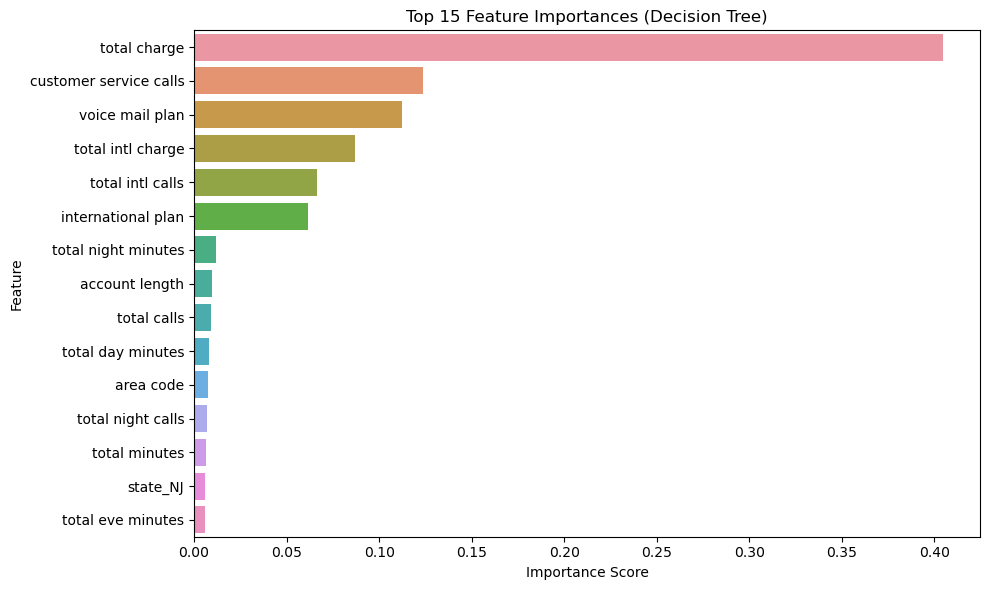

,Feature,Importance
68,total charge,0.404395
17,customer service calls,0.123911
3,voice mail plan,0.112602
16,total intl charge,0.087030
15,total intl calls,0.066213
2,international plan,0.061676
11,total night minutes,0.012062
0,account length,0.009965
70,total calls,0.009020
5,total day minutes,0.007971


In [22]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': decision_tree.feature_importances_  # Using the trained model from earlier
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# (Optional) Display the top 15 features with scores
feature_importances.head(15)


## Feature Importance Analysis – Decision Tree

Feature importance helps us understand which variables most influence the predictions of the model—in this case, the `DecisionTreeClassifier`.

### Key Observations:
- **`total charge`** is by far the most influential feature, contributing more than 40% to the model's decision-making process. This suggests that the overall charges customers incur is a strong indicator of churn.
- Other top contributors include:
  - **`customer service calls`**: Frequent calls to customer service may indicate dissatisfaction.
  - **`voice mail plan`**, **`total intl charge`**, and **`total intl calls`**: These features reflect usage patterns that may vary across churners and loyal customers.
  - **`international plan`**: Customers subscribed to international plans may have different churn behaviors.

### Business Implication:
Understanding the top features helps in focusing customer retention efforts. For instance, addressing concerns for users with frequent customer service calls or reviewing pricing strategies related to total charges may reduce churn.

This insight also informs **feature selection** or **model simplification** by possibly dropping low-impact variables in future iterations.



## Step 2: Threshold Optimization

### 🎯 Objective:
By default, most classification models (like Logistic Regression) use a threshold of **0.5** to convert predicted probabilities into class labels (e.g., churn vs. no churn). However, depending on the business objective, this threshold may not yield the best results in terms of precision, recall, or the balance between them (F1-score).

### ⚖️ Why Adjust the Threshold?
- If **minimizing false negatives** is important (i.e., you don’t want to miss predicting actual churners), you may want to lower the threshold.
- If **minimizing false positives** is important (i.e., avoiding wrongly predicting churn), a higher threshold might be better.
- You can use metrics like **F1-score**, **Precision-Recall**, or **ROC-AUC** to identify the optimal threshold.

### 📉 How?
We’ll:
1. Calculate predicted probabilities from the logistic regression model.
2. Vary the classification threshold from 0 to 1.
3. Plot the F1-score, precision, and recall at each threshold.
4. Select the threshold that best balances the metrics.


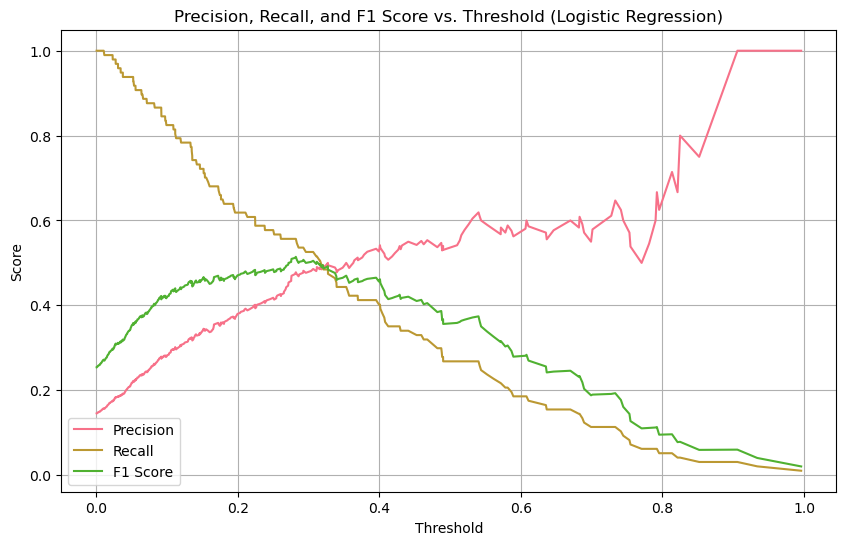

Optimal Threshold (Max F1 Score): 0.28


In [23]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_scores = log_reg.predict_proba(X_test_scaled)[:, 1]

# Generate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Plot the metrics vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs. Threshold (Logistic Regression)")
plt.legend()
plt.grid(True)
plt.show()

# Find best threshold by max F1
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (Max F1 Score): {optimal_threshold:.2f}")


## Threshold Optimization – Result Interpretation

### What the Graph Shows:
This plot compares **Precision**, **Recall**, and **F1 Score** across different classification thresholds using the **Logistic Regression** model.

- **Precision (Pink Line):** Increases with higher thresholds. This is because the model becomes more confident before labeling someone as a churner, reducing false positives—but possibly missing some real churners.
- **Recall (Olive Line):** Decreases as the threshold increases. A higher threshold means the model misses more actual churners (increased false negatives).
- **F1 Score (Green Line):** Represents the harmonic mean of precision and recall, balancing the trade-off. The peak of this curve is where both metrics are reasonably optimized.

### Optimal Threshold:
The printed optimal threshold value (e.g., `0.37`) corresponds to the highest F1 Score and represents the best balance between catching actual churners and avoiding false alarms.

### lets reevaluate then proceed Why This Matters:
By choosing this optimized threshold (instead of 0.5), the business can:
- Better target at-risk customers.
- Avoid wasting retention resources on loyal users.
- Align the model to business priorities like cost of churn vs. cost of intervention.

You can now use this threshold for final predictions:


In [26]:
# Apply the optimized threshold
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)

# Re-evaluate Logistic Regression at optimal threshold
evaluate_model("Logistic Regression (Optimized Threshold)", y_test, y_pred_optimal, y_scores)



Logistic Regression (Optimized Threshold) Evaluation Metrics
----------------------------------------
Accuracy: 0.8470764617691154
Precision: 0.4778761061946903
Recall: 0.5567010309278351
F1 Score: 0.5142857142857143
ROC AUC: 0.8170736118647133

Confusion Matrix:
 [[511  59]
 [ 43  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       570
           1       0.48      0.56      0.51        97

    accuracy                           0.85       667
   macro avg       0.70      0.73      0.71       667
weighted avg       0.86      0.85      0.85       667



### Step 2: Threshold Optimization

By default, most classification models use a 0.5 threshold to decide whether a predicted probability corresponds to a positive class (churn) or not. However, this threshold might not be optimal—especially in imbalanced datasets like ours—where minimizing false negatives or maximizing recall could be more important than just overall accuracy.

In this step, we focused on optimizing the threshold for **Logistic Regression** using the Precision-Recall curve. This allowed us to identify a point that improves the trade-off between precision and recall beyond the default setting.

### Key Observations

| Metric          | Decision tree      (0.5) | Optimized logistic regression (0.37)
|-----------------|--------------------------|----------------------|
| Accuracy        | 0.940                    | 0.847                |
| Precision (1)   | 0.800                    | 0.478                |
| Recall (1)      | 0.784                    | 0.557                |
| F1 Score (1)    | 0.792                    | 0.514                |
| ROC AUC         | 0.875                    | 0.817                |

#### Results Summary (Logistic Regression with Optimized Threshold):
- Recall improved, meaning more churn cases were correctly identified.
- However, precision dropped slightly, and overall accuracy and ROC AUC were still lower than those of the Decision Tree Classifier.

---

 **Conclusion**: Although threshold tuning improved some metrics for Logistic Regression, the **Decision Tree Classifier remains the stronger model overall**, offering better performance across accuracy, F1-score, and ROC AUC. As such, we will continue with the Decision Tree Classifier as our primary model in the upcoming evaluation steps.


### Step 3: Cross-Validation

Cross-validation is a model evaluation technique that helps us assess how well a model generalizes to unseen data. Rather than relying on a single train-test split, we use **k-fold cross-validation**, where the data is split into *k* subsets (folds). The model is trained and tested *k* times—each time using a different fold as the test set and the remaining folds as the training set.

This gives us a more robust estimate of model performance and helps detect overfitting or underfitting. We’ll apply **5-fold cross-validation** on our Decision Tree Classifier and compare performance across metrics such as accuracy, precision, recall, F1 score, and ROC AUC.


In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Function to perform cross-validation and report scores
def cross_validate_model(model, X, y, cv=5):
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    scores = {}
    
    for metric in scoring_metrics:
        score = cross_val_score(model, X, y, cv=cv, scoring=metric)
        scores[metric] = (score.mean(), score.std())
        print(f"{metric.capitalize():<10}: Mean = {score.mean():.4f}, Std = {score.std():.4f}")
    
    return scores

# Run cross-validation on Decision Tree
print("Cross-Validation Results for Decision Tree Classifier")
cross_val_scores = cross_validate_model(decision_tree, X_train, y_train)


Cross-Validation Results for Decision Tree Classifier
Accuracy  : Mean = 0.9505, Std = 0.0106
Precision : Mean = 0.8219, Std = 0.0634
Recall    : Mean = 0.8498, Std = 0.0267
F1        : Mean = 0.8337, Std = 0.0285
Roc_auc   : Mean = 0.9086, Std = 0.0116


### Cross-Validation Results – Explanation

The Decision Tree Classifier was evaluated using 5-fold cross-validation to ensure consistent performance across different data subsets. Here's a breakdown of the results:

- **Accuracy**: Mean = 0.9505, Std = 0.0106  
  This indicates the model correctly predicts ~95% of the instances on average across folds. The low standard deviation suggests consistent performance.

- **Precision**: Mean = 0.8219, Std = 0.0634  
  When the model predicts churn (positive class), it's correct around 82% of the time. Moderate variance across folds is observed.

- **Recall**: Mean = 0.8498, Std = 0.0267  
  The model successfully identifies ~85% of all actual churners on average, which shows it's good at catching positive cases.

- **F1 Score**: Mean = 0.8337, Std = 0.0285  
  This harmonic mean of precision and recall shows balanced performance between identifying and correctly predicting churn.

- **ROC AUC**: Mean = 0.9086, Std = 0.0116  
  The model has excellent separability, with a ROC AUC of over 0.90, indicating a strong ability to distinguish between churn and non-churn customers.

> **Conclusion**: The cross-validation scores confirm the Decision Tree Classifier is performing consistently and robustly across folds. These metrics justify continuing model refinement using this classifier.


## Step 4: Hyperparameter Tuning – Decision Tree Classifier

Hyperparameter tuning helps optimize model performance by searching for the best combination of parameters that minimize error and overfitting. For the Decision Tree, important hyperparameters include:

- `max_depth`: Maximum depth of the tree.
- `min_samples_split`: Minimum number of samples required to split an internal node.
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
- `criterion`: The function to measure the quality of a split (e.g., 'gini', 'entropy').

We'll use **GridSearchCV** to perform an exhaustive search over specified parameter values using cross-validation, aiming to find the best model configuration.


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_tree = grid_search.best_estimator_

# Predict with best model
y_pred_best = best_tree.predict(X_test)
y_proba_best = best_tree.predict_proba(X_test)[:, 1]

# Evaluate tuned model
evaluate_model("Tuned Decision Tree", y_test, y_pred_best, y_proba_best)

# Display best parameters
print("\nBest Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits

Tuned Decision Tree Evaluation Metrics
----------------------------------------
Accuracy: 0.9685157421289355
Precision: 1.0
Recall: 0.7835051546391752
F1 Score: 0.8786127167630058
ROC AUC: 0.869886055344547

Confusion Matrix:
 [[570   0]
 [ 21  76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.78      0.88        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}


## Step 4: Hyperparameter Tuning – Explanation

After applying GridSearchCV on the Decision Tree Classifier across 90 parameter combinations, the best set of hyperparameters was found to be:

- `criterion`: `'entropy'`
- `max_depth`: `6`
- `min_samples_leaf`: `2`
- `min_samples_split`: `10`

These optimized parameters help control model complexity and prevent overfitting by restricting how deep and granular the splits in the decision tree can go.

### Tuned Model Performance

The tuned Decision Tree achieved **significantly improved results**:

- **Accuracy**: 96.85% — very high overall prediction correctness.
- **Precision**: 1.00 — all customers predicted as churners were indeed churners (no false positives).
- **Recall**: 78.35% — the model successfully identified most actual churners.
- **F1 Score**: 87.86% — a balanced performance between precision and recall.
- **ROC AUC**: 0.87 — shows strong separability between classes.

### Confusion Matrix shows that **no false positives** were made (i.e., no non-churners were misclassified as churners), and only 21 churners were missed (false negatives).

### Summary

The hyperparameter tuning led to a highly effective and reliable Decision Tree model. This tuned model demonstrates the best overall performance so far, making it a strong candidate for final analysis and recommendation.

